# Dynamic programming, Jupyter notebook  (7/4 - 2021)

## Exercise

_Bitonic euclidean traveling-salesman problem_

Given a set of _n_ points in the plane, we wish to find the shortest
closed bitonic tour that connects all _n_ points, that is, tours that
start at the leftmost point, go strictly rightward to the rightmost
point, and then go strictly leftward back to the starting point.
Give a dynamic programming solution assuming no two points have the
same _x_-coordinate.

Note this is Problem 15-3 from "Introduction to Algorithms", Thomas H.
Cormen, Charles E. Leiserson, Ronald L. Rivest, Clifford Stein,
page 405, The MIT Press, 2009.

Running time bitonic_tsp(...) 0.000 sec
Most frequent calls to solve:
 [((19, 19), 1), ((0, 19), 1), ((19, 0), 1), ((18, 0), 1), ((17, 0), 1), ((16, 0), 1), ((15, 0), 1), ((14, 0), 1), ((13, 0), 1), ((12, 0), 1)]


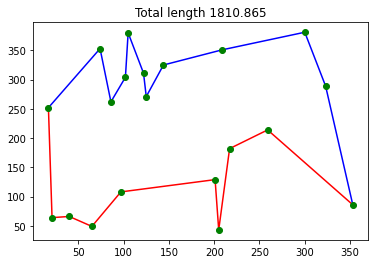

In [5]:
'''
 Bitonic euclidean traveling-salesman problem

Given a set of n points in the plane, we wish to find the shortest
closed bitonic tour that connects all n points, that is, tours that
start at the leftmost point, go strictly rightward to the rightmost
point, and then go strictly leftward back to the starting point.
Give a dynamic programming solution assuming no two points have the
same x-coordinate.

Note this is Problem 15-3 from "Introduction to Algorithms", Thomas H.
Cormen, Charles E. Leiserson, Ronald L. Rivest, Clifford Stein,
page 405, The MIT Press, 2009.
'''

import math
from random import randint
import matplotlib.pyplot as plt
from functools import cache
from time import time

def generate_points(n):
    '''Generate n points with different x-values, worted wrt x.'''
    
    while True:
        points = [(randint(1, n ** 2), randint(1, n ** 2)) for _ in range(n)]

        xs, ys = zip(*points)
        if len(set(xs)) == len(xs):
            break

    return sorted(points)


def dist(p, q):
    '''Compute difference between two points in the plane.'''
    
    px, py = p
    qx, qy = q
    
    return math.sqrt((qx - px) ** 2 + (qy - py) ** 2)


def trace_time(f):
    '''Decorator to print running time of function calls.'''
    
    def wrapper(*args):
        start = time()
        answer = f(*args)
        finish = time()
        print(f'Running time {f.__name__}(...) {finish - start:.3f} sec')
        return answer

    return wrapper


def trace_calls(f):
    '''Decorator to trace recursive calls.'''
    
    indent = 0
    def wrapper(*args):
        nonlocal indent
        print(' ' * indent + f'{f.__name__}({", ".join(map(repr, args))})')
        indent += 1
        answer = f(*args)
        indent -= 1
        return answer
    return wrapper


def memoize(f):
    answers =  {}
    def wrapper(*args):
        if args not in answers:
            answers[args] = f(*args)
        return answers[args]

    return wrapper

calls = {}

@trace_time
def bitonic_tsp(points):
    def d(i, j):
        '''Distance between points[i] and points[j]'''
        
        return dist(points[i], points[j])

    #@trace_calls
    #@memoize
    @cache  # Since Python 3.9
    def solve(i, j):
        '''Find two left-to-right paths from points[0] to points[i},
           and points[0] to points[j], visiting all nodes 0..max(i,j).

           Returns (length, path_i, path_j) where
           length = sum of the lengths of the two paths
           path_i = tuple of node ids on path 0..i
           path_j = tuple of node ids on path 0..j
        '''

        calls[i, j] = calls.get((i, j), 0) + 1
        if i == j == 0:
            length, path_i, path_j = 0, (0,), (0,)
        elif i < j:
            length, path_j, path_i = solve(j, i)
        elif i > j + 1:
            length, path_i, path_j = solve(i - 1, j)
            length += d(i - 1, i)
            path_i = (*path_i, i)
        else:  # i == j or i == j + 1
            length = math.inf
            for k in range(i):
                length_, path_k_, path_j_ = solve(k, j)
                length_ = length_ + d(k, i)
                if length_ < length:
                    length, path_i, path_j = length_, (*path_k_, i), path_j_

        return length, path_i, path_j

    return solve(len(points) - 1, len(points) - 1)

n = 20

points = generate_points(n)
length, A, B = bitonic_tsp(points)

print('Most frequent calls to solve:\n',
      sorted(calls.items(), key=lambda e: e[1], reverse=True)[:10])

for path, color in [(A, 'r'), (B, 'b')]:
#    for i, j in zip(path, path[1:]):
#        plt.plot(*zip(points[i], points[j]), '-' + color)
    plt.plot(*zip(*[points[i] for i in path]), '-' + color)
        
plt.title('Total length %.3f' % length)
plt.plot(*zip(*points), 'og')

plt.show()